In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.groupby(['Pclass'])[['Survived','Fare']].sum()

,Survived,Fare
Pclass,,
1,136,18177.4125
2,87,3801.8417
3,119,6714.6951


In [5]:
# Multiple Groups

df.groupby(['Pclass','Sex'])['Survived'].sum()

Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64

In [6]:
df.groupby(['Pclass','Sex'],as_index=False)['Survived'].sum()

,Pclass,Sex,Survived
0,1,female,91
1,1,male,45
2,2,female,70
3,2,male,17
4,3,female,72
5,3,male,47


In [7]:
df.groupby(['Pclass'])['Survived'].agg(['mean','sum'])

# mean - proportion of people survived

,mean,sum
Pclass,,
1,0.629630,136
2,0.472826,87
3,0.242363,119


In [8]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [9]:
df['age_bins'] = pd.cut(df['Age'],bins=3,labels=('young','middleaged','old'))

In [10]:
df.groupby(['age_bins'])['Survived'].sum()

age_bins
young         130
middleaged    144
old            16
Name: Survived, dtype: int64

In [11]:
bins, edges  = pd.cut(df['Age'],bins=3,labels=('young','middleaged','old'),retbins=True)

In [12]:
print(edges)

[ 0.34042    26.94666667 53.47333333 80.        ]


#  Temperature Dataset

In [13]:
temp = pd.read_csv("temp.csv")

In [14]:
temp

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [15]:
temp.groupby(['city','event'])['temperature'].max()

city      event 
mumbai    Fog       87
          Rain      92
          Sunny     90
new york  Rain      32
          Snow      28
          Sunny     36
paris     Cloudy    54
          Sunny     45
Name: temperature, dtype: int64

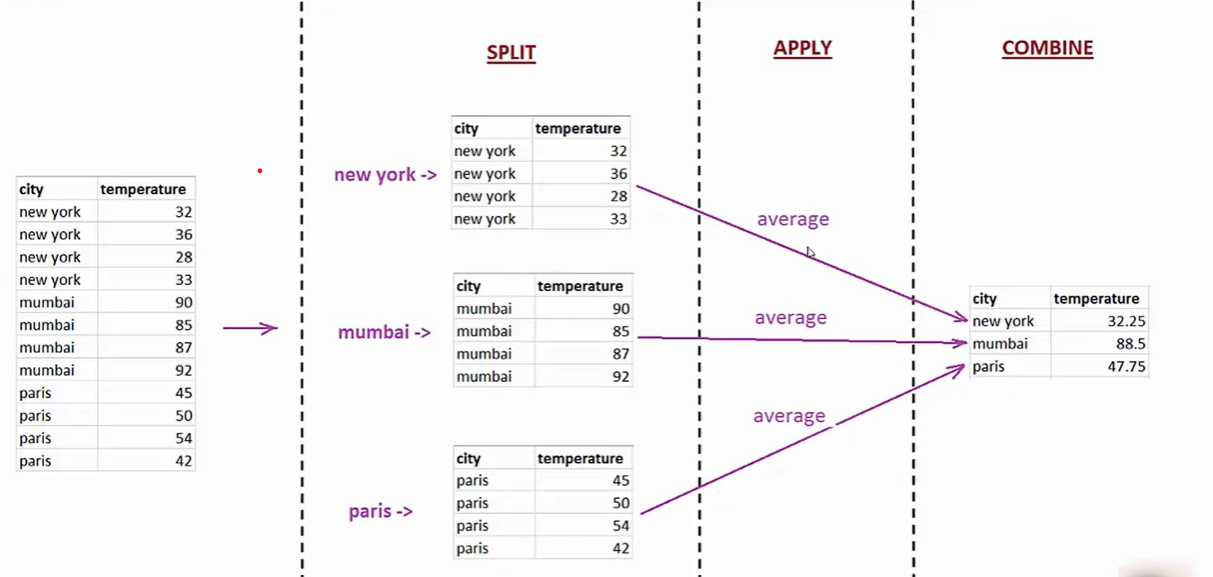